## 🖼️ **CIFAR-10 Image Classification**

## 📌 **Introduction**
The CIFAR-10 dataset consists of **60,000 tiny color images (32x32 pixels)** across **10 object categories**, including airplane, automobile, bird, cat, deer, dog, frog, horse, ship, and truck.  
Image classification is a **core task in computer vision**, helping machines understand and recognize visual information.

This project focuses on:
- Building a **Basic Convolutional Neural Network (CNN)** for image classification.  
- Designing an **Enhanced CNN** with Dropout, Batch Normalization, and Data Augmentation for better generalization.  
- Comparing both models using **accuracy, precision, recall, F1-score, and confusion matrices**.  
- Visualizing **training curves and sample predictions**.

---

## 🎯 **Objectives**
- Perform **data loading and preprocessing** on CIFAR-10 images.  
- Train a **Basic CNN** and evaluate its performance.  
- Develop an **Enhanced CNN** with additional techniques for improved accuracy.  
- Compare **performance metrics** of both models.  
- Visualize **training results and predictions** for better understanding.  


-------------

### **Importing required libraries**

_run this command if you do NOT have these libraries installed_
```bash
pip install -r requirements.txt
```

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import warnings

In [3]:
warnings.filterwarnings('ignore')

In [4]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

In [5]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [6]:
tf.__version__

'2.10.0'

In [7]:
(X_train, y_train),(X_test, y_test) = cifar10.load_data()

In [8]:
print("Train Images: ", X_train.shape)
print("Train Images: ", X_test.shape)

Train Images:  (50000, 32, 32, 3)
Train Images:  (10000, 32, 32, 3)


In [9]:
X_train = X_train.astype('float') /255.0
X_test = X_test.astype('float') /255.0

In [10]:
classes = 10
y_train = to_categorical(y_train,classes)
y_test = to_categorical(y_test,classes)

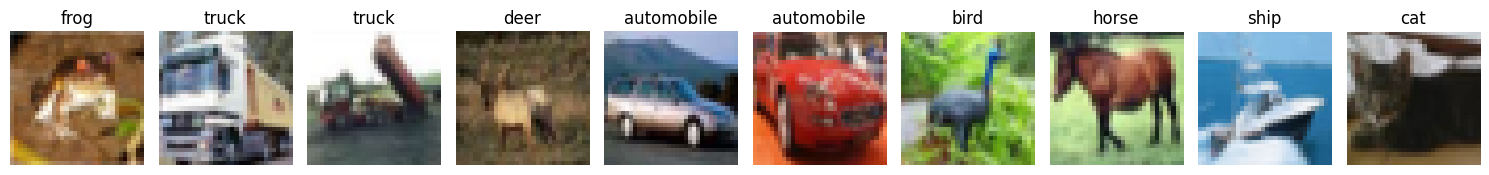

In [11]:
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
plt.figure(figsize=(15,2))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(X_train[i])
    plt.title(class_names[np.argmax(y_train[i])])
    plt.axis('off')
plt.tight_layout()    
plt.show()

## **Level 1: Basic CNN**

In [12]:
model1= models.Sequential([

    #Block 1
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    #block 2
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
]
)

In [13]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                    

In [14]:
optimizer = Adam(learning_rate=0.001)
model1.compile(optimizer=optimizer, loss='categorical_crossentropy',metrics=['accuracy'])

In [15]:
history1 = model1.fit(X_train, y_train, epochs=10, 
                    batch_size=64, 
                    validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 10s 9ms/step - loss: 1.6022 - accuracy: 0.4189 - val_loss: 1.2984 - val_accuracy: 0.5459
Epoch 2/10
625/625 [==============================] - 5s 9ms/step - loss: 1.1681 - accuracy: 0.5819 - val_loss: 1.0786 - val_accuracy: 0.6227
Epoch 3/10
625/625 [==============================] - 5s 9ms/step - loss: 0.9901 - accuracy: 0.6493 - val_loss: 0.9703 - val_accuracy: 0.6499
Epoch 4/10
625/625 [==============================] - 5s 8ms/step - loss: 0.8715 - accuracy: 0.6952 - val_loss: 0.8767 - val_accuracy: 0.6946
Epoch 5/10
625/625 [==============================] - 5s 8ms/step - loss: 0.7875 - accuracy: 0.7243 - val_loss: 0.8372 - val_accuracy: 0.7086
Epoch 6/10
625/625 [==============================] - 5s 9ms/step - loss: 0.7193 - accuracy: 0.7487 - val_loss: 0.7775 - val_accuracy: 0.7303
Epoch 7/10
625/625 [==============================] - 5s 8ms/step - loss: 0.6600 - accuracy: 0.7701 - val_loss: 0.7649 - val_accuracy: 0.7375
Epoch

## **Level 2: Advanced Model** 

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=15, width_shift_range=0.1,height_shift_range=0.1,horizontal_flip=True,zoom_range=0.1)
datagen.fit(X_train)

In [17]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint(filepath="best.h5", save_best_only=True, monitor='val_accuracy', mode='max')

In [18]:
from tensorflow.keras.layers import BatchNormalization, Dropout
model2= models.Sequential([

    layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)),
    BatchNormalization(),
    layers.Conv2D(32,(3,3), padding='same', activation='relu'),
    BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    Dropout(0.25),

    
    layers.Conv2D(64,(3,3), padding='same', activation='relu'),
    BatchNormalization(),
    layers.Conv2D(64,(3,3), padding='same', activation='relu'),
    BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    Dropout(0.3),

    layers.Conv2D(128,(3,3), padding='same', activation='relu'),
    BatchNormalization(),
    layers.Conv2D(128,(3,3), padding='same', activation='relu'),
    BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    Dropout(0.4),
    
    
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    Dropout(0.5),
    layers.Dense(10, activation='softmax')
]
)

In [19]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                      

In [20]:
optimizer = Adam(learning_rate=0.001)
model2.compile(optimizer=optimizer, loss='categorical_crossentropy',metrics=['accuracy'])

In [21]:
history2 = model2.fit(X_train, y_train, batch_size=64, 
                    epochs=25, 
                    validation_split=0.2,
                    callbacks=[checkpoint])

Epoch 1/25
625/625 [==============================] - 11s 14ms/step - loss: 1.5900 - accuracy: 0.4239 - val_loss: 1.4281 - val_accuracy: 0.4877
Epoch 2/25
625/625 [==============================] - 8s 13ms/step - loss: 1.1695 - accuracy: 0.5853 - val_loss: 1.0900 - val_accuracy: 0.6146
Epoch 3/25
625/625 [==============================] - 8s 13ms/step - loss: 1.0087 - accuracy: 0.6457 - val_loss: 0.9641 - val_accuracy: 0.6582
Epoch 4/25
625/625 [==============================] - 8s 13ms/step - loss: 0.9100 - accuracy: 0.6850 - val_loss: 0.8000 - val_accuracy: 0.7247
Epoch 5/25
625/625 [==============================] - 8s 13ms/step - loss: 0.8173 - accuracy: 0.7175 - val_loss: 1.1710 - val_accuracy: 0.6274
Epoch 6/25
625/625 [==============================] - 8s 13ms/step - loss: 0.7514 - accuracy: 0.7448 - val_loss: 0.7415 - val_accuracy: 0.7414
Epoch 7/25
625/625 [==============================] - 8s 13ms/step - loss: 0.6957 - accuracy: 0.7619 - val_loss: 0.7164 - val_accuracy: 0.753

In [22]:
model2.load_weights("best.h5")

In [23]:
loss1, acc1= model1.evaluate(X_test, y_test)
loss2, acc2= model2.evaluate(X_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.4941 - accuracy: 0.8402


In [24]:
pred1 = model1.predict(X_test)
pred1 = np.argmax(pred1, axis=1) 

313/313 [==============================] - 1s 3ms/step


In [25]:
pred2 = model2.predict(X_test)
pred2 = np.argmax(pred2, axis=1) 

313/313 [==============================] - 2s 4ms/step


In [26]:
true_labels = [class_names[i] for i in np.argmax(y_test[:10], axis=1)]

In [27]:
pred1_labels = [class_names[i] for i in pred1[:10]]
pred2_labels = [class_names[i] for i in pred2[:10]]

In [28]:
import pandas as pd
cmp = pd.DataFrame({'True Labels': true_labels, 'Basic': pred1_labels, 'Advanced': pred2_labels})

In [29]:
cmp

,True Labels,Basic,Advanced
0,cat,cat,cat
1,ship,ship,ship
2,ship,ship,ship
3,airplane,ship,airplane
4,frog,frog,frog
5,frog,frog,frog
6,automobile,automobile,automobile
7,frog,frog,frog
8,cat,cat,cat
9,automobile,automobile,automobile


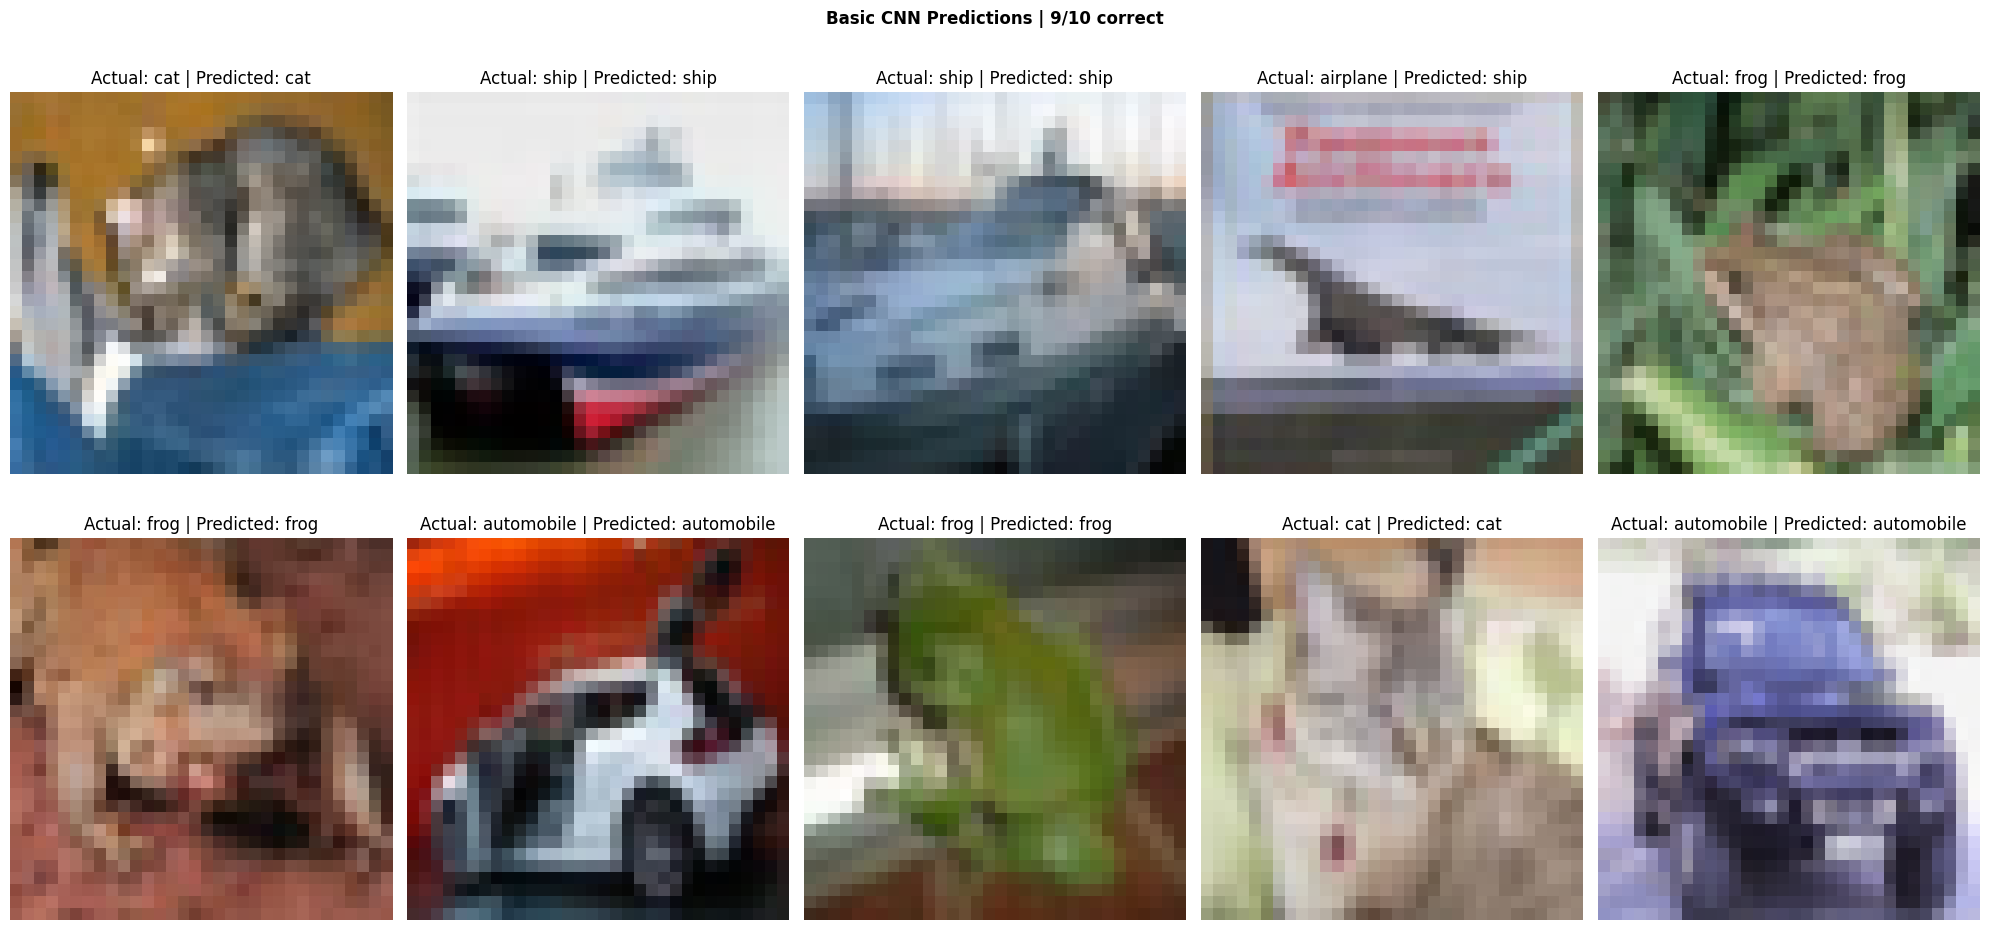

In [58]:
correct_label = [i is j for i,j in zip(pred1_labels, true_labels)].count(True)
plt.figure(figsize=(20,10))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_test[i])
    plt.title(f"Actual: {true_labels[i]} | Predicted: {pred1_labels[i]}")
    plt.axis(False)

plt.suptitle(f"Basic CNN Predictions | {correct_label}/10 correct", fontweight='bold')
plt.tight_layout()
plt.show()

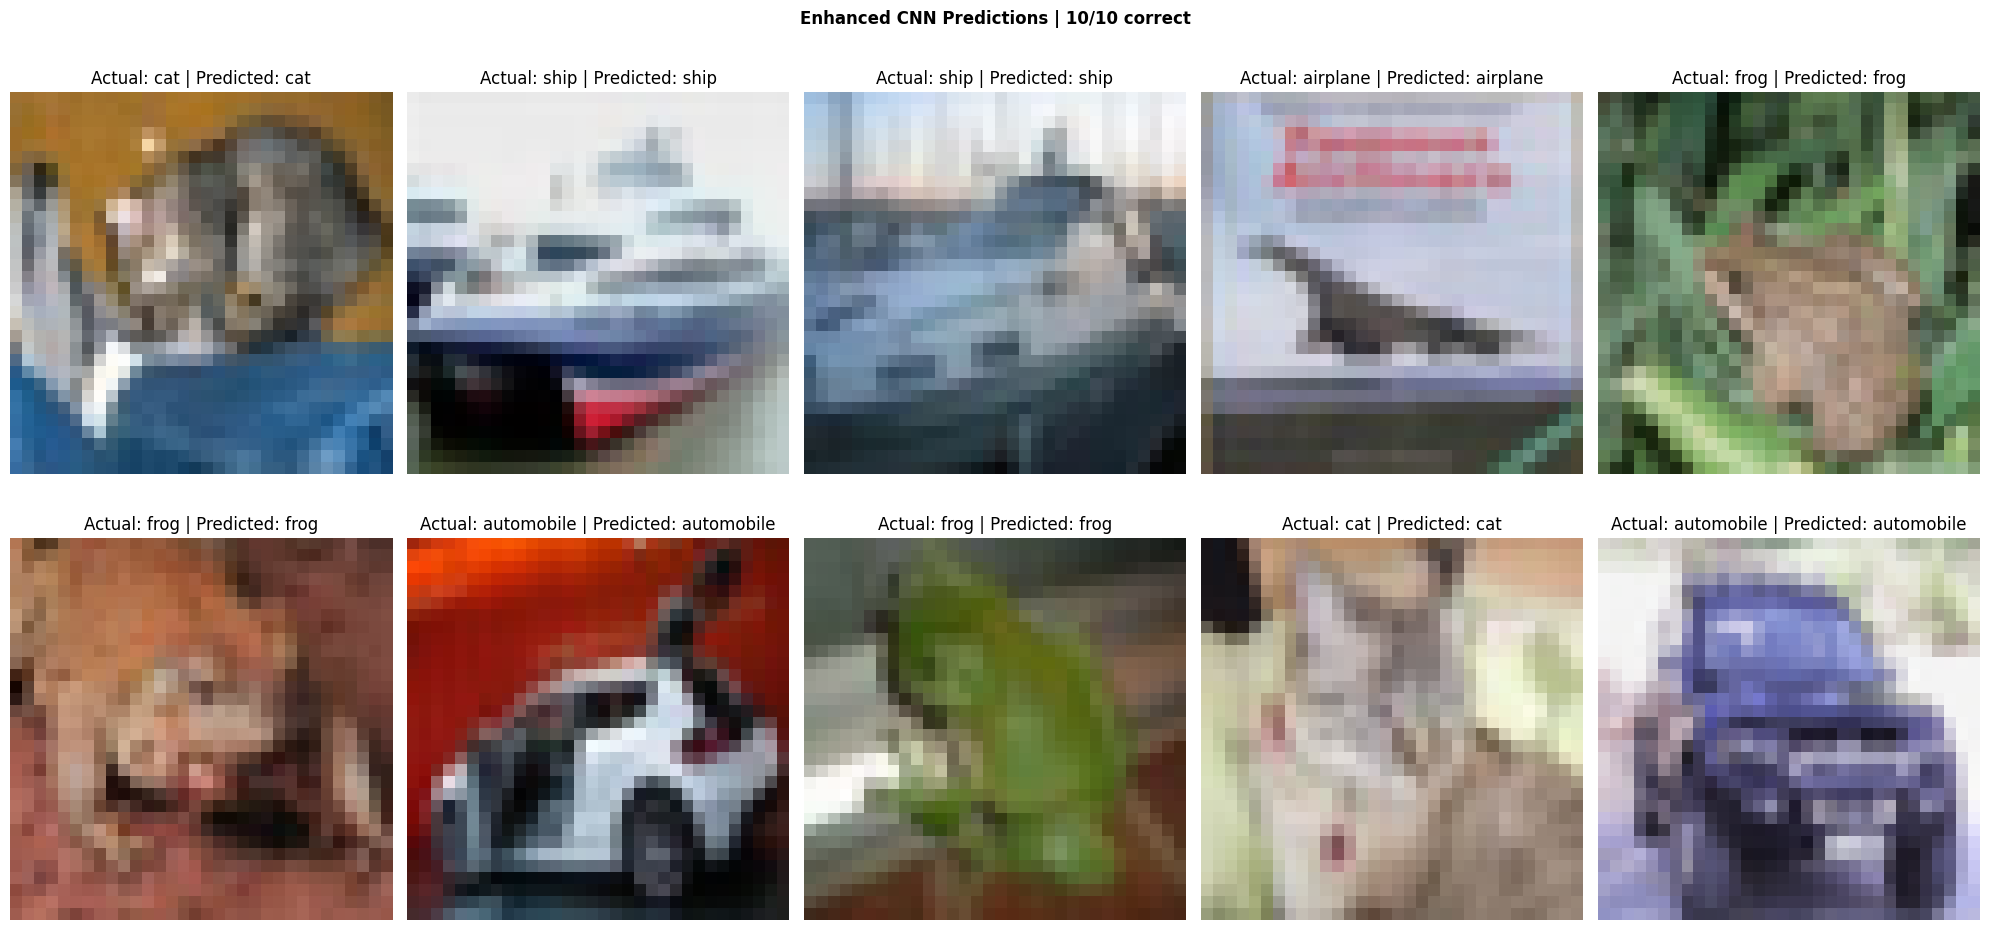

In [57]:
correct_label = [i is j for i,j in zip(pred2_labels, true_labels)].count(True)
plt.figure(figsize=(20,10))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_test[i])
    plt.title(f"Actual: {true_labels[i]} | Predicted: {pred2_labels[i]}")
    plt.axis(False)

plt.suptitle(f"Enhanced CNN Predictions | {correct_label}/10 correct", fontweight='bold')
plt.tight_layout()
plt.show()

## **Testing on Real data**

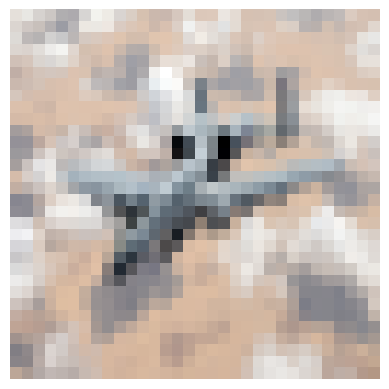

In [106]:
from PIL import Image
test = "test_data/airplane.jpg"
img = Image.open(test)
img = img.resize((32, 32))
plt.imshow(img)
plt.axis(False)
plt.show()

In [117]:
img_data = np.array(img) /255.0
img_data= np.expand_dims(img_data, axis=0)

In [ ]:
pred = model1.predict(img_data)
pred_label = class_names[np.argmax(pred, axis=1)[0]]
pred_label

1/1 [==============================] - 0s 26ms/step


In [126]:
pred = model2.predict(img_data)
pred_label = class_names[np.argmax(pred, axis=1)[0]]
pred_label

1/1 [==============================] - 0s 356ms/step


'ship'